In [36]:
# 1. Carregue o dataset e exiba as 10 primeiras linhas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?', low_memory=False)
print(df.head(10))

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   
5  16/12/2006  17:29:00                3.520                  0.522   235.02   
6  16/12/2006  17:30:00                3.702                  0.520   235.09   
7  16/12/2006  17:31:00                3.700                  0.520   235.22   
8  16/12/2006  17:32:00                3.668                  0.510   233.99   
9  16/12/2006  17:33:00                3.662                  0.510   233.86   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1

    2. Diferença entre Global_active_power e Global_reactive_power

    Global_active_power: Energia ativa (em kW) realmente consumida pelos aparelhos.
    Global_reactive_power: Energia reativa (em kW) usada para criar campos magnéticos/indutivos, não convertida em trabalho útil.


In [8]:
# 3. Verifique valores ausentes

missing = df.isnull().sum()
print(missing)
print(f"Total de valores ausentes: {missing.sum()}")

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
Total de valores ausentes: 181853


In [9]:
# 4. Converta Date para datetime e crie coluna do dia da semana

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Weekday'] = df['Date'].dt.day_name()
print(df[['Date', 'Weekday']].head())

        Date   Weekday
0 2006-12-16  Saturday
1 2006-12-16  Saturday
2 2006-12-16  Saturday
3 2006-12-16  Saturday
4 2006-12-16  Saturday


In [19]:
# 5. Filtre registros de 2007 e calcule média diária de Global_active_power

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

df_2007 = df[df['Date'].dt.year == 2007].copy()

df_2007['Global_active_power'] = pd.to_numeric(df_2007['Global_active_power'], errors='coerce')

media_diaria = df_2007.groupby('Date')['Global_active_power'].mean()

print(media_diaria)

Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
                ...   
2007-12-27    1.758471
2007-12-28    2.161842
2007-12-29    2.290942
2007-12-30    1.777025
2007-12-31    1.539265
Name: Global_active_power, Length: 365, dtype: float64


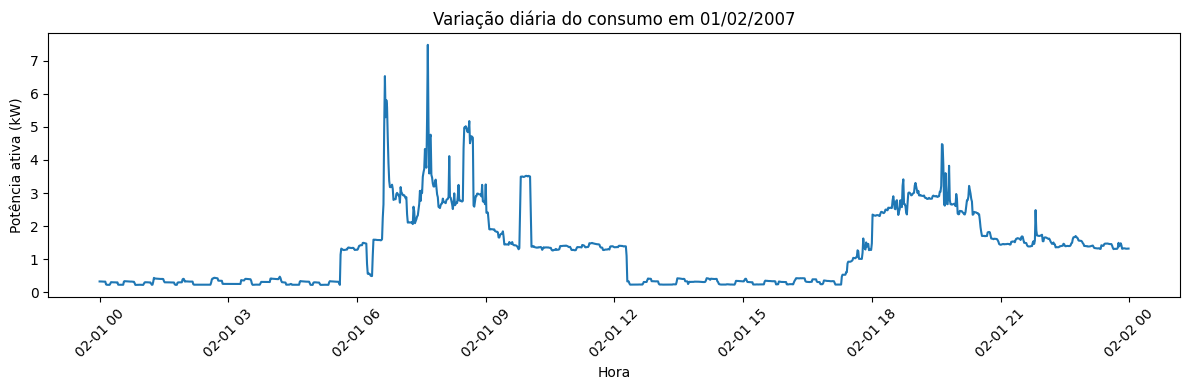

In [14]:
# 6. Gráfico de linha da variação de Global_active_power em um dia

um_dia = df_2007[df_2007['Date'] == pd.Timestamp('2007-02-01')].copy()

um_dia['Datetime'] = pd.to_datetime(um_dia['Date'].astype(str) + ' ' + um_dia['Time'])

plt.figure(figsize=(12,4))
plt.plot(um_dia['Datetime'], um_dia['Global_active_power'])
plt.title('Variação diária do consumo em 01/02/2007')
plt.xlabel('Hora')
plt.ylabel('Potência ativa (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

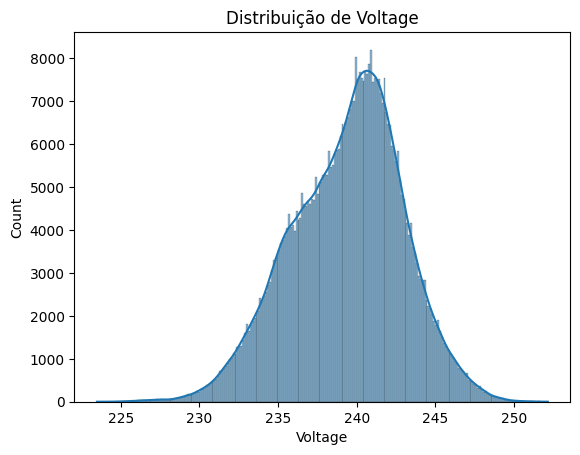

In [16]:
# 7. Histograma da variável Voltage

df_2007['Voltage'] = pd.to_numeric(df_2007['Voltage'], errors='coerce')
sns.histplot(df_2007['Voltage'].dropna(), kde=True)
plt.title('Distribuição de Voltage')
plt.show()
# Observação: Normalmente apresenta distribuição aproximadamente normal.

In [17]:
# 8. Consumo médio por mês

df_2007['Month'] = df_2007['Date'].dt.to_period('M')
media_mensal = df_2007.groupby('Month')['Global_active_power'].mean()
print(media_mensal)

Month
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
2007-05    0.985862
2007-06    0.826814
2007-07    0.667367
2007-08    0.764186
2007-09    0.969318
2007-10    1.103911
2007-11    1.294473
2007-12    1.626474
Freq: M, Name: Global_active_power, dtype: float64


In [20]:
# 9. Dia com maior consumo de energia ativa global

consumo_dia = df_2007.groupby('Date')['Global_active_power'].sum()
maior_consumo = consumo_dia.idxmax()
print(f"Dia de maior consumo: {maior_consumo}, Consumo: {consumo_dia.max()}")

Dia de maior consumo: 2007-02-03 00:00:00, Consumo: 4029.722


In [42]:
# 10. Consumo médio em dias de semana vs finais de semana

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

df_2007 = df[df['Date'].dt.year == 2007].copy()

df_2007['Weekday'] = df_2007['Date'].dt.day_name()

df_2007['is_weekend'] = df_2007['Weekday'].isin(['Saturday', 'Sunday'])

df_2007['Global_active_power'] = pd.to_numeric(df_2007['Global_active_power'], errors='coerce')

media_semana = df_2007.groupby('is_weekend')['Global_active_power'].mean()

print("Consumo médio em dias de semana (False) e finais de semana (True):")
print(media_semana)

Consumo médio em dias de semana (False) e finais de semana (True):
is_weekend
False    1.039379
True     1.315375
Name: Global_active_power, dtype: float64


In [22]:
# 11. Correlação entre variáveis

cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
for col in cols:
    df_2007[col] = pd.to_numeric(df_2007[col], errors='coerce')
print(df_2007[cols].corr())

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.269886 -0.348237   
Global_reactive_power             0.269886               1.000000 -0.106531   
Voltage                          -0.348237              -0.106531  1.000000   
Global_intensity                  0.999061               0.285749 -0.359587   

                       Global_intensity  
Global_active_power            0.999061  
Global_reactive_power          0.285749  
Voltage                       -0.359587  
Global_intensity               1.000000  


In [24]:
# 12. Nova variável Total_Sub_metering

for sm in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    df_2007[sm] = pd.to_numeric(df_2007[sm], errors='coerce')
df_2007['Total_Sub_metering'] = df_2007['Sub_metering_1'] + df_2007['Sub_metering_2'] + df_2007['Sub_metering_3']

In [41]:
# 13. Algum mês em que Total_Sub_metering > média de Global_active_power?

df_2007['Month'] = df_2007['Date'].dt.to_period('M')

media_gap = df_2007['Global_active_power'].mean()

meses = df_2007.groupby('Month')['Total_Sub_metering'].mean()

print(meses[meses > media_gap])

Month
2007-01    10.423518
2007-02     9.486135
2007-03    10.212863
2007-04     6.839375
2007-05     8.452442
2007-06     7.379151
2007-07     5.697724
2007-08     6.979336
2007-09     8.206236
2007-10     8.674493
2007-11     9.819413
2007-12    11.636551
Freq: M, Name: Total_Sub_metering, dtype: float64


/tmp/ipython-input-715382951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2008['Voltage'] = pd.to_numeric(df_2008['Voltage'], errors='coerce')


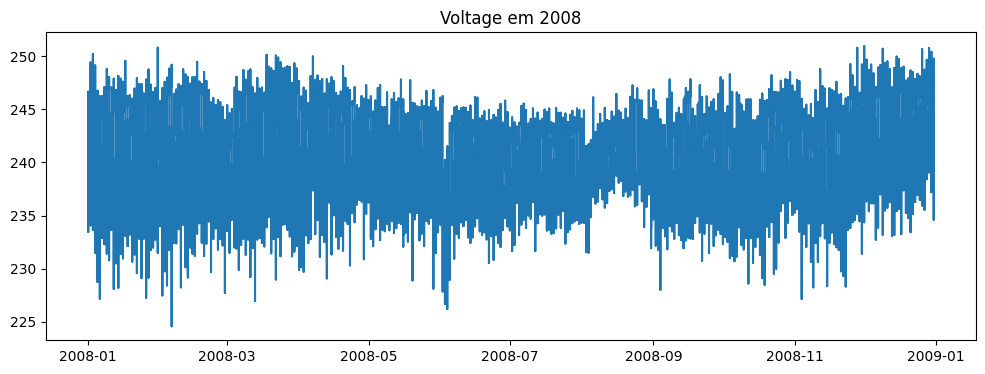

In [27]:
# Gráfico temporal do Voltage para 2008

df_2008 = df[df['Date'].dt.year == 2008]
df_2008['Voltage'] = pd.to_numeric(df_2008['Voltage'], errors='coerce')
plt.figure(figsize=(12,4))
plt.plot(df_2008['Date'], df_2008['Voltage'])
plt.title('Voltage em 2008')
plt.show()

In [28]:
# 15. Compare consumo verão e inverno (hemisfério norte)

# Verão: Jun, Jul, Ago. Inverno: Dez, Jan, Fev
df_2007['Month_num'] = df_2007['Date'].dt.month
verao = df_2007[df_2007['Month_num'].isin([6,7,8])]
inverno = df_2007[df_2007['Month_num'].isin([12,1,2])]
print("Média verão:", verao['Global_active_power'].mean())
print("Média inverno:", inverno['Global_active_power'].mean())

Média verão: 0.7520419551873244
Média inverno: 1.528646305798835


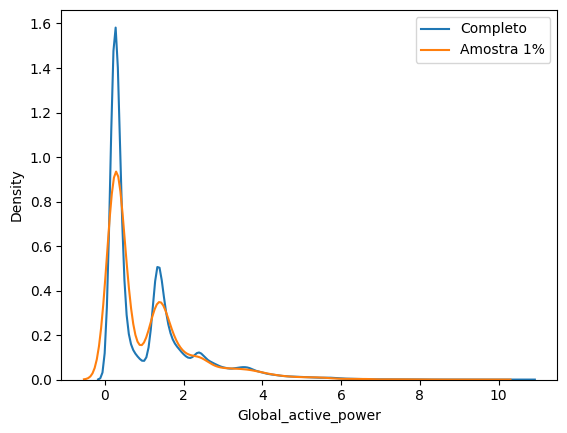

In [29]:
# 16. Amostragem aleatória de 1% dos dados

sample = df_2007.sample(frac=0.01, random_state=42)
sns.kdeplot(df_2007['Global_active_power'].dropna(), label='Completo')
sns.kdeplot(sample['Global_active_power'].dropna(), label='Amostra 1%')
plt.legend()
plt.show()

In [32]:
# 17. Min-Max Scaling nas variáveis principais

num_vars = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
scaler = MinMaxScaler()
df_2007[num_vars] = scaler.fit_transform(df_2007[num_vars])

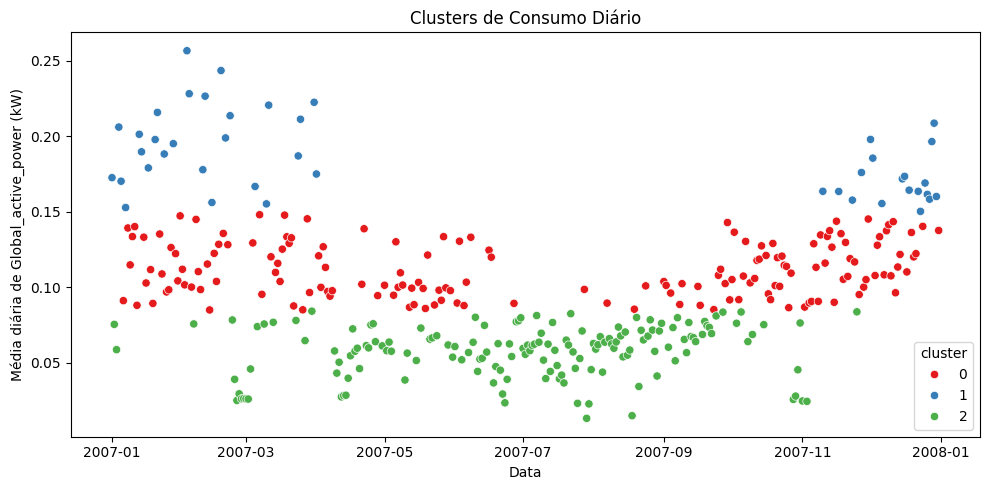

In [39]:
# 18. K-means para segmentar dias em 3 grupos

dias = df_2007.groupby('Date')['Global_active_power'].mean().reset_index()

dias = dias.dropna(subset=['Global_active_power'])

kmeans = KMeans(n_clusters=3, random_state=42)
dias['cluster'] = kmeans.fit_predict(dias[['Global_active_power']])

plt.figure(figsize=(10,5))
sns.scatterplot(x='Date', y='Global_active_power', hue='cluster', data=dias, palette='Set1')
plt.title('Clusters de Consumo Diário')
plt.xlabel('Data')
plt.ylabel('Média diária de Global_active_power (kW)')
plt.tight_layout()
plt.show()

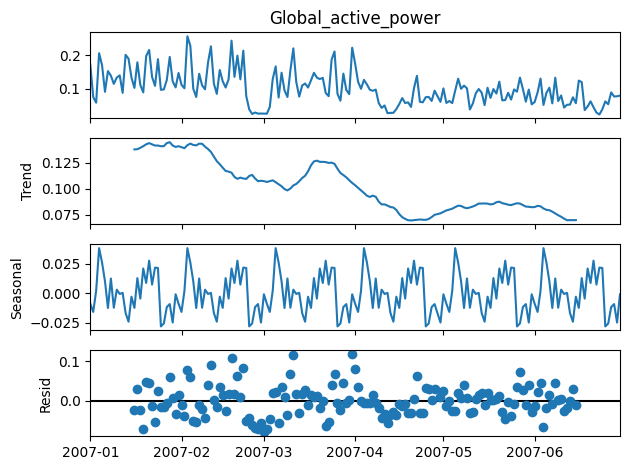

In [38]:
# 19. Decomposição de série temporal (6 meses)

df_6m = df_2007[(df_2007['Date'] >= '2007-01-01') & (df_2007['Date'] < '2007-07-01')].copy()
ts = df_6m.groupby('Date')['Global_active_power'].mean()

ts = ts.dropna()

result = seasonal_decompose(ts, model='additive', period=30)
result.plot()
plt.tight_layout()
plt.show()

In [37]:
# 20. Regressão linear para prever Global_active_power a partir de Global_intensity

X = df_2007[['Global_intensity']].dropna()
y = df_2007.loc[X.index, 'Global_active_power']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

MSE: 2.2601113669543212e-05
